In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib notebook

In [14]:
'''data = pd.read_excel('../Input_Excel/emissions2017.xlsx', header = 1, index_col=None)
data.to_pickle('../pickleJar/emissions2017.pkl')'''

In [18]:
# Import Data
df = pd.read_pickle('../pickleJar/emissions2017.pkl')
movers = pickle.load(open('../pickleJar/PrimeMovers.pkl', 'rb'))
plants = pickle.load(open('../pickleJar/PlantIDs_NG.pkl', 'rb'))
df = df[['Plant Code',
         'Plant Name',
         'State', 
         'Sector Group',
         'Prime Mover',
         'Fuel Code',
         'Generation (kWh)',
         'Fuel Consumption for Electric Generation (MMBtu)']]

In [19]:
effish = df.loc[(df['Prime Mover'].isin(movers)) &
                  (df['Plant Code'].isin(plants)) &
                  (df['Fuel Code'] == 'NG') &
                   (df['Sector Group'] == 'ELECTRIC POWER')]

effish.head(10)

,Plant Code,Plant Name,State,Sector Group,Prime Mover,Fuel Code,Generation (kWh),Fuel Consumption for Electric Generation (MMBtu)
0,3,Barry,AL,ELECTRIC POWER,CA,NG,2.958047e+09,756470.0
1,3,Barry,AL,ELECTRIC POWER,CT,NG,5.458926e+09,57873437.0
3,3,Barry,AL,ELECTRIC POWER,ST,NG,9.428405e+07,1001765.0
4,7,Gadsden,AL,ELECTRIC POWER,ST,NG,1.932730e+08,2224437.0
7,9,Copper,TX,ELECTRIC POWER,GT,NG,1.891300e+07,357035.0
8,10,Greene County,AL,ELECTRIC POWER,GT,NG,6.182377e+07,842133.0
10,10,Greene County,AL,ELECTRIC POWER,ST,NG,8.216300e+08,9175786.0
13,26,E C Gaston,AL,ELECTRIC POWER,ST,NG,1.463800e+09,15614683.0
15,47,Colbert,AL,ELECTRIC POWER,GT,NG,1.396800e+07,268212.0
17,51,Dolet Hills,LA,ELECTRIC POWER,ST,NG,1.719167e+07,215351.0


In [20]:
effish = effish.apply(lambda x:x*1e6 if x.name in ['Fuel Consumption for Electric Generation (MMBtu)'] else x)

In [21]:
effish['Heat Rate (Btu/kWh)'] = (effish['Fuel Consumption for Electric Generation (MMBtu)']/
                                 effish['Generation (kWh)'])
effish.head(10)

,Plant Code,Plant Name,State,Sector Group,Prime Mover,Fuel Code,Generation (kWh),Fuel Consumption for Electric Generation (MMBtu),Heat Rate (Btu/kWh)
0,3,Barry,AL,ELECTRIC POWER,CA,NG,2.958047e+09,7.564700e+11,255.732921
1,3,Barry,AL,ELECTRIC POWER,CT,NG,5.458926e+09,5.787344e+13,10601.615959
3,3,Barry,AL,ELECTRIC POWER,ST,NG,9.428405e+07,1.001765e+12,10624.967850
4,7,Gadsden,AL,ELECTRIC POWER,ST,NG,1.932730e+08,2.224437e+12,11509.300316
7,9,Copper,TX,ELECTRIC POWER,GT,NG,1.891300e+07,3.570350e+11,18877.756041
8,10,Greene County,AL,ELECTRIC POWER,GT,NG,6.182377e+07,8.421330e+11,13621.507921
10,10,Greene County,AL,ELECTRIC POWER,ST,NG,8.216300e+08,9.175786e+12,11167.783552
13,26,E C Gaston,AL,ELECTRIC POWER,ST,NG,1.463800e+09,1.561468e+13,10667.221608
15,47,Colbert,AL,ELECTRIC POWER,GT,NG,1.396800e+07,2.682120e+11,19201.890034
17,51,Dolet Hills,LA,ELECTRIC POWER,ST,NG,1.719167e+07,2.153510e+11,12526.473577


<h3 align='Center'><b>Generators With Zero Net Generation or Zero Fuel Consumption</b></h3>
<p>1.) Identify sites with zero gen or consumption and save to file.<br>
    2.) Remove zero gen or consumption sites from analysis.</p>
<h6>Results</h6>
<p>There are 277 generators reporting either 0 net generation or<br>
    0 fuel consumed for electricity generation<br>
    After switching to total electrcity generated,<br>
    the number is reduced to 0.
</p>

In [23]:
dispose = effish.loc[effish['Heat Rate (Btu/kWh)'].isin([np.inf, -np.inf, np.nan, 0])]
print(dispose['Heat Rate (Btu/kWh)'].count())
dispose.to_pickle('../pickleJar/ZeroGen_or_Consumption.pkl')
effish = effish.loc[~effish['Heat Rate (Btu/kWh)'].isin([np.inf, -np.inf, np.nan, 0])]
effish['Thermal Efficiency (%)'] = effish['Heat Rate (Btu/kWh)'].apply(lambda x: 100*(3412/x))
effish.head(10)

0


,Plant Code,Plant Name,State,Sector Group,Prime Mover,Fuel Code,Generation (kWh),Fuel Consumption for Electric Generation (MMBtu),Heat Rate (Btu/kWh),Thermal Efficiency (%)
0,3,Barry,AL,ELECTRIC POWER,CA,NG,2.958047e+09,7.564700e+11,255.732921,1334.204445
1,3,Barry,AL,ELECTRIC POWER,CT,NG,5.458926e+09,5.787344e+13,10601.615959,32.183773
3,3,Barry,AL,ELECTRIC POWER,ST,NG,9.428405e+07,1.001765e+12,10624.967850,32.113038
4,7,Gadsden,AL,ELECTRIC POWER,ST,NG,1.932730e+08,2.224437e+12,11509.300316,29.645590
7,9,Copper,TX,ELECTRIC POWER,GT,NG,1.891300e+07,3.570350e+11,18877.756041,18.074182
8,10,Greene County,AL,ELECTRIC POWER,GT,NG,6.182377e+07,8.421330e+11,13621.507921,25.048622
10,10,Greene County,AL,ELECTRIC POWER,ST,NG,8.216300e+08,9.175786e+12,11167.783552,30.552168
13,26,E C Gaston,AL,ELECTRIC POWER,ST,NG,1.463800e+09,1.561468e+13,10667.221608,31.985836
15,47,Colbert,AL,ELECTRIC POWER,GT,NG,1.396800e+07,2.682120e+11,19201.890034,17.769084
17,51,Dolet Hills,LA,ELECTRIC POWER,ST,NG,1.719167e+07,2.153510e+11,12526.473577,27.238312


<h3>Generators with Efficiency greater than 100%</h3>
<p>
    There are 90 generators with efficiency >= 100%
</p>

In [24]:
effish.loc[effish['Thermal Efficiency (%)'] >= 100]

,Plant Code,Plant Name,State,Sector Group,Prime Mover,Fuel Code,Generation (kWh),Fuel Consumption for Electric Generation (MMBtu),Heat Rate (Btu/kWh),Thermal Efficiency (%)
0,3,Barry,AL,ELECTRIC POWER,CA,NG,2.958047e+09,7.564700e+11,255.732921,1334.204445
63,124,Demoss Petrie,AZ,ELECTRIC POWER,GT,NG,9.358000e+06,1.280000e+08,13.678136,24944.918750
75,147,Kyrene,AZ,ELECTRIC POWER,CA,NG,3.602710e+08,7.469200e+10,207.321711,1645.751422
116,358,Mountainview Generating Station,CA,ELECTRIC POWER,CA,NG,1.548997e+09,3.893360e+11,251.347182,1357.484886
129,400,Haynes,CA,ELECTRIC POWER,CA,NG,9.163740e+08,2.691620e+11,293.725051,1161.630575
...,...,...,...,...,...,...,...,...,...,...
5048,58427,Lansing BWL REO Town Plant,MI,ELECTRIC POWER,CA,NG,4.218600e+07,3.515700e+10,833.380742,409.416708
5059,58503,Carty Generating Station,OR,ELECTRIC POWER,CA,NG,8.805080e+08,7.605860e+11,863.803622,394.997186
5068,58557,Mesquite Generating Station Block 1,AZ,ELECTRIC POWER,CA,NG,8.752820e+08,1.605926e+12,1834.752685,185.965118
5125,59220,Wildcat Point Generation Facility,MD,ELECTRIC POWER,CA,NG,1.124289e+07,6.510000e+08,57.903262,5892.586894


<h3>Generators with efficiency between 59% and 100 %</h3>
<a>
    
</a>

In [26]:
effish.loc[(effish['Thermal Efficiency (%)'] >= 59) &
           (effish['Thermal Efficiency (%)'] <= 100)].count()

Plant Code                                          16
Plant Name                                          16
State                                               16
Sector Group                                        16
Prime Mover                                         16
Fuel Code                                           16
Generation (kWh)                                    16
Fuel Consumption for Electric Generation (MMBtu)    16
Heat Rate (Btu/kWh)                                 16
Thermal Efficiency (%)                              16
dtype: int64

<h3 align='center'>Negative Net Generation</h3>
<p>1.)Negative net generation is interesting and needs to be better understood.<br>
    2.)Identify negative generators and save to file.<br>
    3.)Remove negative generators for now
 <h6>Results</h6>
 <p>There are 43 generators with negative net generation.</p>

In [9]:
negnetgen = effish.loc[effish['Heat Rate (Btu/kWh)'] < 0]
negnetgen.to_pickle('../pickleJar/NegativeNetGeneration.pkl')
effish = effish.loc[effish['Heat Rate (Btu/kWh)'] > 0]
effish['Heat Rate (Btu/kWh)'].describe()

count    1.118000e+03
mean     8.154059e+04
std      1.499811e+06
min      1.635669e+00
25%      1.026046e+04
50%      1.159472e+04
75%      1.370683e+04
max      4.678800e+07
Name: Heat Rate (Btu/kWh), dtype: float64

In [10]:
effish.groupby('Reported\nPrime Mover')['Heat Rate (Btu/kWh)'].describe()

,count,mean,std,min,25%,50%,75%,max
Reported Prime Mover,,,,,,,,
CA,98.0,1714.964931,2.726602e+03,1.635669,288.264968,724.290621,1553.140838,1.776437e+04
CS,8.0,10423.756468,3.392456e+03,7298.701907,8461.623462,10084.390906,10552.999261,1.816667e+04
CT,213.0,11283.423093,2.284523e+03,4138.296360,10620.418259,11290.492851,12014.573765,2.095726e+04
FC,6.0,9961.114539,5.980317e+03,5545.998219,5875.413210,6809.033443,13338.646013,1.952323e+04
GT,430.0,187451.411529,2.415366e+06,13.678136,11231.335909,12696.050260,16317.499231,4.678800e+07
IC,140.0,33490.500213,1.169266e+05,12.510768,9284.213204,10474.568400,12622.953316,1.047667e+06
ST,223.0,14148.051035,1.034948e+04,604.704100,10848.616570,11801.520952,13599.557932,1.041089e+05


/data/data/com.termux/files/usr/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:342: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds


Text(0.5, 0.98, 'Distribution of heat rates by Prime Mover')

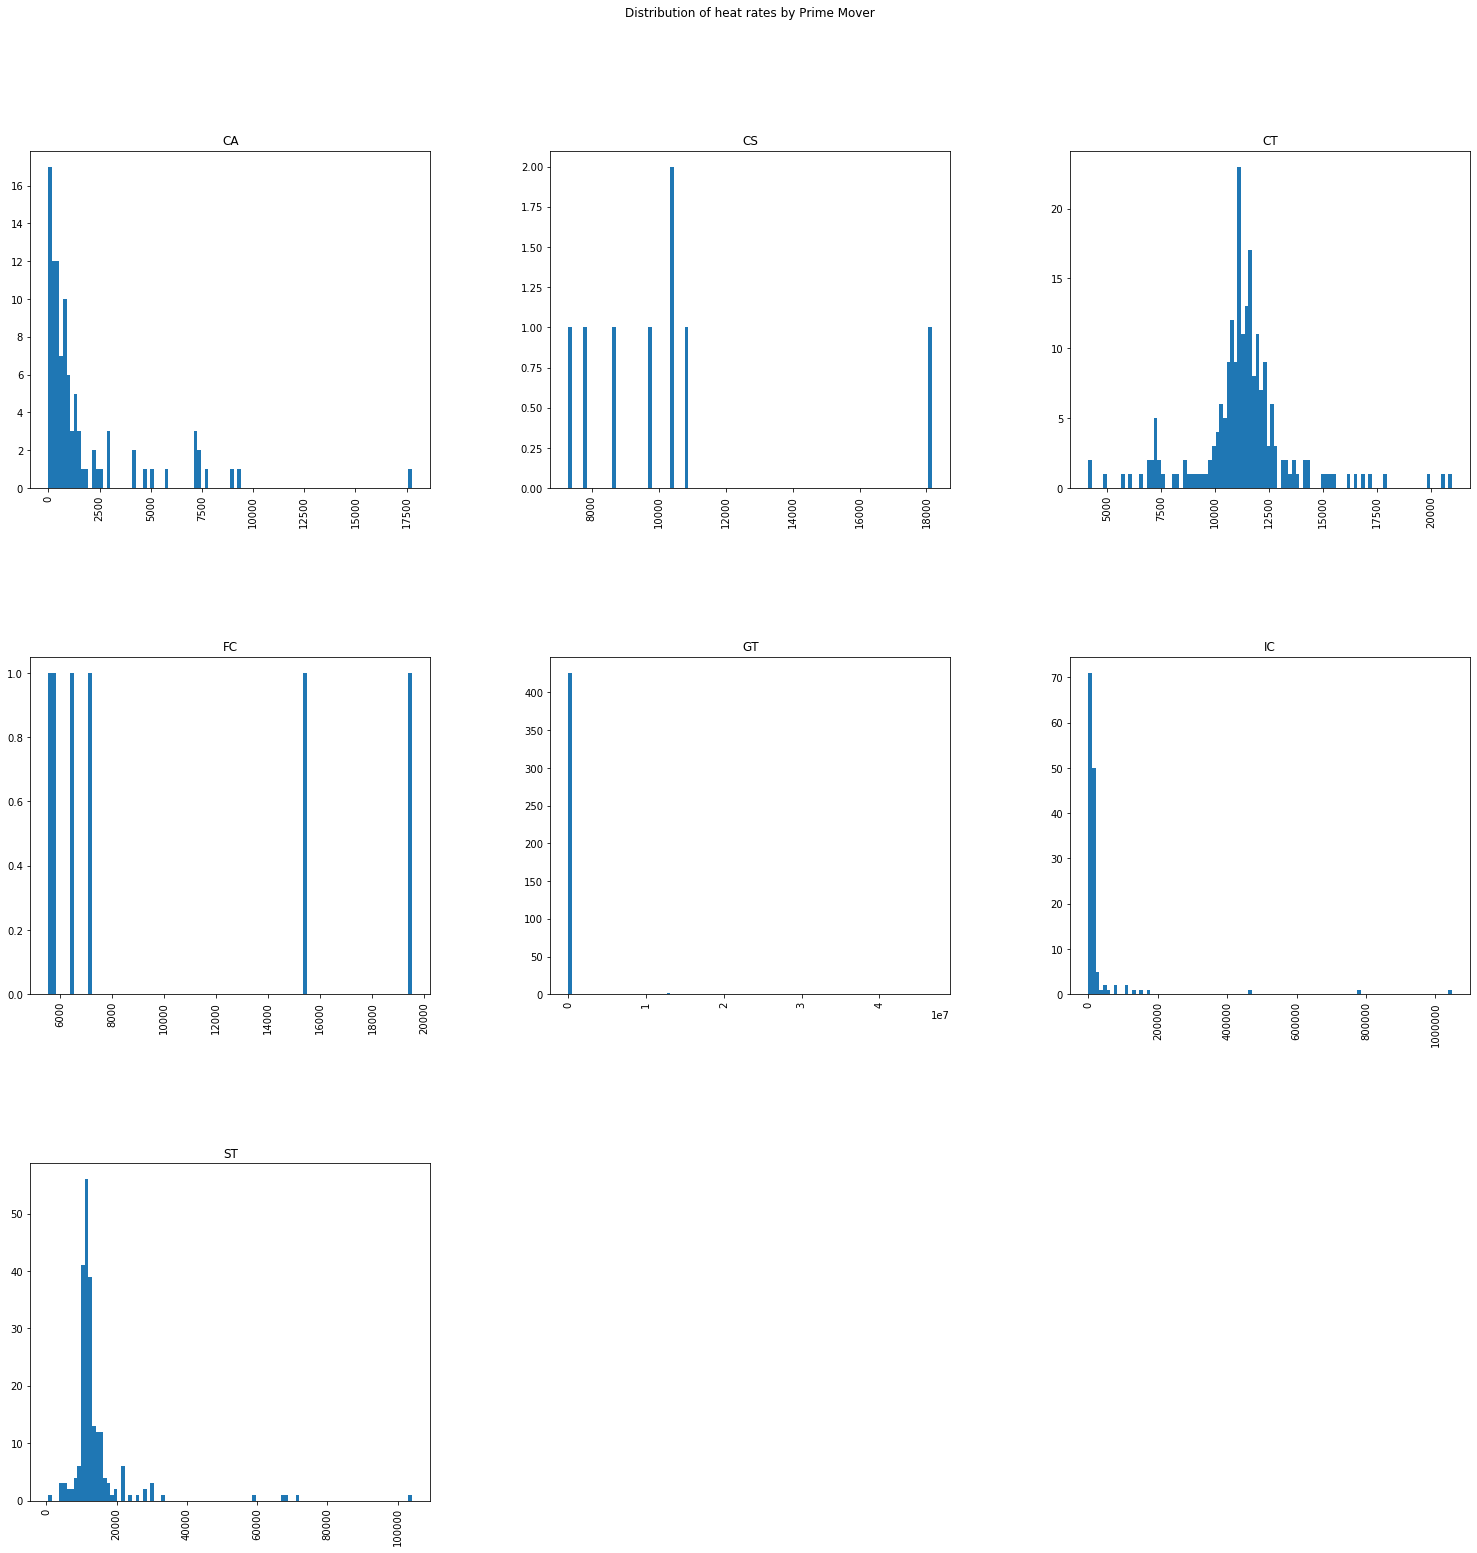

In [11]:
fig, axes = plt.subplots(figsize=(25,25))

effish['Heat Rate (Btu/kWh)'].hist(by=effish['Reported\nPrime Mover'], figsize=(50,50), bins=100, ax=axes)

plt.suptitle('Distribution of heat rates by Prime Mover', fontsize='large')